# # Food-101 Challenge

Thomas Butterfield

In [1]:
import os
import glob
import zipfile
import functools
import sys
import random
import pickle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
# mpl.rcParams['figure.figsize'] = (12,12)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.image as mpimg
import pandas as pd
from PIL import Image

import tensorflow as tf
import tensorflow.contrib as tfcontrib
from tensorflow.python.keras import layers
from tensorflow.python.keras import losses
from tensorflow.python.keras import models
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.initializers import glorot_uniform

from tensorflow.contrib.slim.python.slim.nets.resnet_utils import *

from tensorflow.python.keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.python.keras.models import Model, load_model
from tensorflow.python.keras.optimizers import SGD
from tensorflow.python.keras.utils.np_utils import to_categorical

# found going through tensorflow first then to keras helps in loading modules effectively instead of going throuhg keras straight away


from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions 


from keras import layers
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)


In [2]:
# Directory path of food 101 data set
food101_dir = '/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/'

In [3]:
# Reads train/test data into a pandas dataframe
Test_Image_Label_df = pd.read_json(food101_dir+'meta/test.json')
Train_Image_Label_df = pd.read_json(food101_dir+'meta/train.json')

In [4]:
# Displays the first few rows of the dataframe
Test_Image_Label_df.head()

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1061830,hot_and_sour_soup/1000486,samosa/1009326,sashimi/100113,pork_chop/1012227,spring_rolls/1005480,panna_cotta/1006650,beef_tartare/101073,greek_salad/1010850,foie_gras/1007306,...,chicken_quesadilla/10257,pho/1002382,prime_rib/1006976,cheesecake/1023543,ice_cream/1004744,omelette/1019294,grilled_cheese_sandwich/1000938,lobster_roll_sandwich/1002698,nachos/1011831,oysters/1005672
1,churros/1064042,hot_and_sour_soup/1004564,samosa/1024186,sashimi/1017182,pork_chop/1019077,spring_rolls/103010,panna_cotta/1027460,beef_tartare/1029120,greek_salad/1029680,foie_gras/1044237,...,chicken_quesadilla/1030292,pho/1020153,prime_rib/102197,cheesecake/102854,ice_cream/1031536,omelette/1058816,grilled_cheese_sandwich/1003050,lobster_roll_sandwich/1029665,nachos/101954,oysters/1017801
2,churros/1074903,hot_and_sour_soup/1011278,samosa/1036216,sashimi/1043094,pork_chop/102958,spring_rolls/1036175,panna_cotta/1030883,beef_tartare/1030025,greek_salad/1053670,foie_gras/1073688,...,chicken_quesadilla/1052529,pho/1026354,prime_rib/102813,cheesecake/1073148,ice_cream/1075106,omelette/1116874,grilled_cheese_sandwich/1005927,lobster_roll_sandwich/103891,nachos/103312,oysters/1019666
3,churros/1085259,hot_and_sour_soup/1029400,samosa/103689,sashimi/1050391,pork_chop/1040432,spring_rolls/1044858,panna_cotta/103712,beef_tartare/1031053,greek_salad/1062715,foie_gras/1113614,...,chicken_quesadilla/1096804,pho/1028507,prime_rib/1035695,cheesecake/1092082,ice_cream/1100243,omelette/1122818,grilled_cheese_sandwich/100694,lobster_roll_sandwich/104300,nachos/1044020,oysters/1040557
4,churros/1097261,hot_and_sour_soup/1044215,samosa/1052427,sashimi/10551,pork_chop/1045605,spring_rolls/1067952,panna_cotta/1050629,beef_tartare/1066933,greek_salad/1101710,foie_gras/1125178,...,chicken_quesadilla/1102036,pho/1029709,prime_rib/105375,cheesecake/1096018,ice_cream/1106165,omelette/1145379,grilled_cheese_sandwich/1052563,lobster_roll_sandwich/1046809,nachos/1060157,oysters/1044823


In [5]:
Train_Image_Label_df.head()

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1004234,hot_and_sour_soup/1002782,samosa/1008131,sashimi/1001239,pork_chop/1000802,spring_rolls/1002160,panna_cotta/1001332,beef_tartare/1000431,greek_salad/1007149,foie_gras/1004944,...,chicken_quesadilla/1004279,pho/1005681,prime_rib/1001089,cheesecake/1001446,ice_cream/1012277,omelette/1001719,grilled_cheese_sandwich/1003153,lobster_roll_sandwich/100009,nachos/100284,oysters/1008124
1,churros/1013460,hot_and_sour_soup/1003688,samosa/1011601,sashimi/1001363,pork_chop/1006233,spring_rolls/1003056,panna_cotta/1003460,beef_tartare/1005746,greek_salad/1009138,foie_gras/1008577,...,chicken_quesadilla/1009225,pho/1011443,prime_rib/1006320,cheesecake/1004515,ice_cream/101858,omelette/1007843,grilled_cheese_sandwich/10060,lobster_roll_sandwich/1001432,nachos/1009513,oysters/1016229
2,churros/1016791,hot_and_sour_soup/1008185,samosa/101365,sashimi/1002556,pork_chop/1019530,spring_rolls/1003507,panna_cotta/1011097,beef_tartare/1009672,greek_salad/1010520,foie_gras/1011711,...,chicken_quesadilla/1011413,pho/1012513,prime_rib/100945,cheesecake/1004807,ice_cream/102595,omelette/1015300,grilled_cheese_sandwich/1007544,lobster_roll_sandwich/100646,nachos/1011394,oysters/1023832
3,churros/102100,hot_and_sour_soup/1008701,samosa/1015943,sashimi/1007253,pork_chop/1019569,spring_rolls/1008736,panna_cotta/1013000,beef_tartare/1012128,greek_salad/1011665,foie_gras/1017233,...,chicken_quesadilla/1023828,pho/1019401,prime_rib/10120,cheesecake/1017408,ice_cream/1044117,omelette/1029915,grilled_cheese_sandwich/1013343,lobster_roll_sandwich/100655,nachos/1013641,oysters/103236
4,churros/1025494,hot_and_sour_soup/1008924,samosa/1016296,sashimi/1010510,pork_chop/1025391,spring_rolls/1012525,panna_cotta/1020036,beef_tartare/1027680,greek_salad/1012989,foie_gras/1023512,...,chicken_quesadilla/1024740,pho/1021371,prime_rib/1016126,cheesecake/1021942,ice_cream/104465,omelette/1038109,grilled_cheese_sandwich/1016030,lobster_roll_sandwich/100702,nachos/1014846,oysters/1038150


In [6]:
# Directory path of the food 101 image library
Images_dir = food101_dir+'images/'

In [7]:
# Initialises a list in order to concatenate two pandas data frames
LCM = []
# Reads Labels/Classes data into seperate pandas dataframes
Labels_df = pd.read_csv(food101_dir+'meta/labels.txt', index_col = None, header = None, names = ['Labels'])
Classes_df = pd.read_csv(food101_dir+'meta/classes.txt', index_col = None, header = None, names = ['Classes'])

# Appends dataframes to list (LCM)
LCM.append(Labels_df)
LCM.append(Classes_df)
# Concatenates separate dataframes into a single dataframe mapping Labels to Classes with indexes
Labels_Classes_Mapping = pd.concat(LCM, axis=1)
# Displays first few rows of the dataframe
Labels_Classes_Mapping.head()

,Labels,Classes
0,Apple pie,apple_pie
1,Baby back ribs,baby_back_ribs
2,Baklava,baklava
3,Beef carpaccio,beef_carpaccio
4,Beef tartare,beef_tartare


In [8]:
# Initialises train/test/validation dictionary datasets 
# that will map the file path of image (key) to the Label index of the image (value)
Test_Image_ds = {}
Train_Image_ds = {}
Valid_Image_ds = {}

# For loop algorithm that iterates over column heading i (Classes) of the train/test dataframes 
# and then maps Class to the right Label index using the Labels/Class Mapping dataframe
for i in Test_Image_Label_df:
    index = 0
    for b in Labels_Classes_Mapping['Classes']:
        if i == b:
            Label = index
            break
        
        index += 1
        
# With the Label index determined, for every element a (images) under the Class i column heading,
# create an entry into the dictionary with the full path of image (key) along with its Label index (value)
    for a in Test_Image_Label_df[i]:
        Test_Image_ds[Images_dir+a+'.jpg'] = Label

# Repeat same process for Train dataframe
for i in Train_Image_Label_df:
    index = 0
    for b in Labels_Classes_Mapping['Classes']:
        if i == b:
            Label = index
            index = 0
            break
        
        index += 1
    
    for a in Train_Image_Label_df[i]:
        Train_Image_ds[Images_dir+a+'.jpg'] = Label

In [9]:
# Print number of examples (length) of train/test/validation dictionary datasets
num_train_examples = len(Train_Image_ds) 
num_test_examples = len(Test_Image_ds)
num_val_examples = len(Valid_Image_ds)
print("Number of training examples: {}".format(num_train_examples))
print("Number of validation examples: {}".format(num_val_examples))
print("Number of testing examples: {}".format(num_test_examples))

Number of training examples: 75750
Number of validation examples: 0
Number of testing examples: 25250


In [10]:
# Turn train/test/validation dictionary datasets into lists
# Reason being so that they could be printed to screen
Train_ImgLabel_List = list(Train_Image_ds.items())
Valid_ImgLabel_List = list(Valid_Image_ds.items())
Test_ImgLabel_List = list(Test_Image_ds.items())

In [11]:
# Using the train_test_split imported function split the training dataset into train/validation datasets, 80/20
Train_ImgLabel_List, Valid_ImgLabel_List = \
                    train_test_split(Train_ImgLabel_List, test_size=0.2, random_state=42)

In [12]:
# Print the first 3 elements of each list dataset
# Notice how using the train_test_split function as randomised the data in training/vaildation sets
# But the Test set remains ordered with the first list entries all having index '23'
print('Training Set:\n', Train_ImgLabel_List[:3], '\n')
print('Validation Set:\n', Valid_ImgLabel_List[:3], '\n')
print('Test Set:\n', Test_ImgLabel_List[:3])

Training Set:
 [('/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/spring_rolls/3700593.jpg', 92), ('/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/waffles/948929.jpg', 100), ('/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/cheesecake/1751518.jpg', 16)] 

Validation Set:
 [('/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/frozen_yogurt/2584688.jpg', 45), ('/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/donuts/3570357.jpg', 31), ('/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/omelette/3520398.jpg', 67)] 

Test Set:
 [('/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/churros/1061830.jpg', 23), ('/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/churros/1064042.jpg', 23), ('/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/churros/1074903.jpg', 23)]


In [13]:
# Label index 23 is mapped to Churros in the Labels/Classes Mapping dataframe
Label = Labels_Classes_Mapping['Labels'][23]
print(Label)

Churros


In [14]:
# The Test set feels left out so this imported function randomised the list entries
random.shuffle(Test_ImgLabel_List)

In [15]:
# Print number of examples (length) of train/test/validation list datasets
# The previously empty validation set now has 15150 examples
num_train_examples = len(Train_ImgLabel_List)
num_test_examples = len(Test_ImgLabel_List)
num_val_examples = len(Valid_ImgLabel_List)
print("Number of training examples: {}".format(num_train_examples))
print("Number of validation examples: {}".format(num_val_examples))
print("Number of testing examples: {}".format(num_test_examples))

Number of training examples: 60600
Number of validation examples: 15150
Number of testing examples: 25250


In [16]:
# Initialises seperate file path and Labels lists for simpler processing
Train_Img_Filepaths = []
Train_Labels = []
Valid_Img_Filepaths = []
Valid_Labels = []
Test_Img_Filepaths = []
Test_Labels = []

# For loop to seperate train/test/validation list of lists into single lists
# Mapping file path list to Label index list by means of the list index i
for i in Train_ImgLabel_List:
    Train_Img_Filepaths.append(i[0])
    Train_Labels.append(i[1])
for i in Valid_ImgLabel_List:
    Valid_Img_Filepaths.append(i[0])
    Valid_Labels.append(i[1])
for i in Test_ImgLabel_List:
    Test_Img_Filepaths.append(i[0])
    Test_Labels.append(i[1])

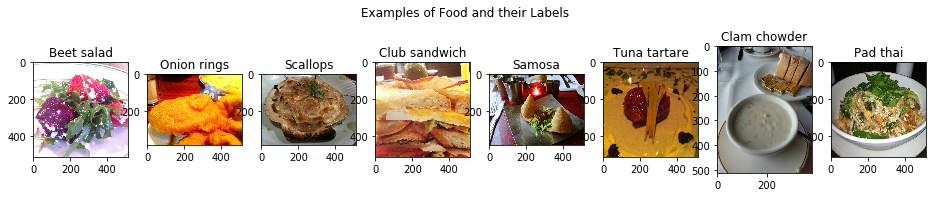

In [17]:
# Visualises the data by creating a plot of 8 random food images attached to their Labels
display_num = 8
r_choices = np.random.choice(num_train_examples, display_num) # Get 8 random numbers from num_train_examples

# Plot with figsize (16,3), 1 row, 8 columns
plt.figure(figsize=(16, 3))
for i in range(0, display_num, 1):
    img_num = r_choices[i]
    plt.subplot(1, 8, i+1)
    plt.imshow(mpimg.imread(Train_Img_Filepaths[img_num]))
    plt.title(Labels_Classes_Mapping['Labels'][Train_Labels[img_num]])
    
plt.suptitle("Examples of Food and their Labels")
plt.show()

In [18]:
n_classes = 101 # Number of possible classes/labels

# Creates Numpy arrays of the label index data
Train_Labels = np.array(Train_Labels)
Test_Labels = np.array(Test_Labels)
Valid_Labels = np.array(Valid_Labels)

# Use the to_categorical imported function to create one hot encoded lists for the Label indexes
# For use with the models 'categorical_crossentropy' loss function
train_label_cat = to_categorical(Train_Labels, num_classes=n_classes)
test_label_cat = to_categorical(Test_Labels, num_classes=n_classes)
valid_label_cat = to_categorical(Valid_Labels, num_classes=n_classes)

In [19]:
Train_Labels # Example of numpy array training labels

array([ 92, 100,  16, ...,  37,  54,  93])

In [20]:
train_label_cat # Example of one hot encoded training label array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
# Model Training Parameters
img_shape = (64, 64, 3) # Standardize input shape of image
batch_size = 32 # batch size
epochs = 1 # number of epochs the model will train for

With greater image resolution (greater image shape) performance improves, more precise localisation and less loss of information during encoding can be attained. The model can also be deeper. But it considerably increases training time.
In addition reducing batch size with increase training time but increasing batch size may be too computationally expensive. Personnally I tried a few different settings and found 32 to be of adequate performance.

In [22]:
# Defines function that processes the image filepath returning a decoded image with 3 depth channels for RGB colours
def _process_pathnames(img_filepath):
    img_str = tf.read_file(img_filepath)
    img = tf.image.decode_jpeg(img_str, channels=3)
    return img

In [23]:
# Defines function that performs a translation shift height or width ways 
# so that the individual pixel positions of the output image differ from the original input image
def shift_img(output_img, width_shift_range, height_shift_range):
    if width_shift_range or height_shift_range:
        if width_shift_range:
            width_shift_range = tf.random_uniform([], 
                                                  -width_shift_range * img_shape[1],
                                                  width_shift_range * img_shape[1])
        if height_shift_range:
            height_shift_range = tf.random_uniform([], 
                                                   -height_shift_range * img_shape[0],
                                                   height_shift_range * img_shape[0])
     
        output_img = tfcontrib.image.translate(output_img,
                                             [width_shift_range, height_shift_range])
        
    return output_img

In [24]:
# Defines function that performs a left/right flip on the input image
# again so that there is variation in the pixel position compared with the original
def flip_img(horizontal_flip, tr_img):
    if horizontal_flip:
        flip_prob = tf.random_uniform([], 0.0, 1.0)
        tr_img = tf.cond(tf.less(flip_prob, 0.5), 
                         lambda: (tf.image.flip_left_right(tr_img)), 
                         lambda: (tr_img))
    return tr_img

In [25]:
# Defines function that performs all of the data augmenting functions on input image
def _augment(img,
             resize=None,  # Resize the image to some size e.g. [64, 64]
             scale=1,  # Scale image e.g. 1 / 255.
             hue_delta=0,  # Adjust the hue of an RGB image by random factor
             horizontal_flip=False,  # Random left/right flip,
             width_shift_range=0,  # Randomly translate the image horizontally
             height_shift_range=0):  # Randomly translate the image vertically 
    if resize is not None:
    # Resize images
        img = tf.image.resize_images(img, resize)
  
    if hue_delta:
    # Adjust hue of image
        img = tf.image.random_hue(img, hue_delta)
  
    img = flip_img(horizontal_flip, img) # Left/right flip
    img = shift_img(img, width_shift_range, height_shift_range) # Width/height shift
    img = tf.to_float(img) * scale # Adjust scale of pixel values (scale 1 / 255 so pixel values are between 0 and 1)
    return img

In [26]:
# Defines function that embodies all of the preprocessing functions that need to be applied to input data
def get_baseline_dataset(filenames, 
                         labels,
                         preproc_fn=functools.partial(_augment),
                         threads=5, 
                         batch_size=batch_size,
                         shuffle=True):           
    num_x = len(filenames)
    
    # Create a tf.data.Dataset from the filenames
    img_dataset = tf.data.Dataset.from_tensor_slices(filenames)
    
    # Map our preprocessing functions to every element in our dataset,
    # taking advantage of multithreading
    img_dataset = img_dataset.map(_process_pathnames, num_parallel_calls=threads)
    img_dataset = img_dataset.map(preproc_fn, num_parallel_calls=threads)
    
    # Get rid????
    if preproc_fn.keywords is not None and 'resize' not in preproc_fn.keywords:
        assert batch_size == 1, "Batching images must be of the same size"
    
    # Create a tf.data.Dataset from labels 
    # (using tf.cast if they are integers)
    label_dataset = tf.data.Dataset.from_tensor_slices(tf.cast(labels, tf.int32))
    
    # Creates a dataset joining (ziping) together the image and label datasets
    dataset = tf.data.Dataset.zip((img_dataset, label_dataset))
    
    print(dataset) # Print created dataset to show shapes and types
    
    # Shuffle the data 
    if shuffle:
        dataset = dataset.shuffle(num_x)
  
  
    # It's necessary to repeat our data for all epochs (but with different augmentations)
    # Repeats dataset indefinetely
    dataset = dataset.repeat().batch(batch_size)
    return dataset

In [28]:
# Custom training proprocessing augmentation settings
train_config = {
    'resize': [img_shape[0], img_shape[1]],
    'scale': 1 / 255.,
    'hue_delta': 0.1,
    'horizontal_flip': True,
    'width_shift_range': 0.1,
    'height_shift_range': 0.1
}
train_preprocessing_fn = functools.partial(_augment, **train_config)

In [29]:
# Custom validation/test proprocessing augmentation settings
# No need to augment the images for validation/test set because
# the model does not alter its parameters due to them
# They are only there for reference and evaluation of the model
valid_config = {
    'resize': [img_shape[0], img_shape[1]],
    'scale': 1 / 255.,
}
valid_preprocessing_fn = functools.partial(_augment, **valid_config)

In [30]:
# Create training/validation/test datasets using the get_baseline_dataset function
# with training or validation preprocessing functions
# Additionally, one hot encoded vector labels ('x_label_cat') can be used here
# in conjunction with the 'categorical_crossentropy' loss function in the model
# or the integer based labels ('x_Labels') can be used in conjunction with
# the 'spare_categorical_crossentropy' loss function in the model
train_ds = get_baseline_dataset(Train_Img_Filepaths, 
                                train_label_cat,
                                preproc_fn=valid_preprocessing_fn,
                                batch_size=batch_size)
valid_ds = get_baseline_dataset(Valid_Img_Filepaths, 
                                valid_label_cat,
                                preproc_fn=valid_preprocessing_fn,
                                batch_size=batch_size)
test_ds = get_baseline_dataset(Test_Img_Filepaths, 
                                test_label_cat,
                                preproc_fn=valid_preprocessing_fn,
                                batch_size=batch_size)


W0701 17:30:06.932400 4483450304 deprecation.py:323] From <ipython-input-25-3fe2ab49ae83>:19: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


<DatasetV1Adapter shapes: ((64, 64, 3), (101,)), types: (tf.float32, tf.int32)>
<DatasetV1Adapter shapes: ((64, 64, 3), (101,)), types: (tf.float32, tf.int32)>
<DatasetV1Adapter shapes: ((64, 64, 3), (101,)), types: (tf.float32, tf.int32)>


In [31]:
print(Train_Img_Filepaths[:8])

['/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/spring_rolls/3700593.jpg', '/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/waffles/948929.jpg', '/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/cheesecake/1751518.jpg', '/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/lobster_roll_sandwich/691778.jpg', '/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/pulled_pork_sandwich/1366163.jpg', '/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/hot_dog/336873.jpg', '/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/tacos/1561938.jpg', '/Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/images/gyoza/258422.jpg']


W0701 17:30:08.327924 4483450304 deprecation.py:323] From <ipython-input-32-92470afcef03>:7: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


<DatasetV1Adapter shapes: ((64, 64, 3), (101,)), types: (tf.float32, tf.int32)>
Data Augmentation Round 1


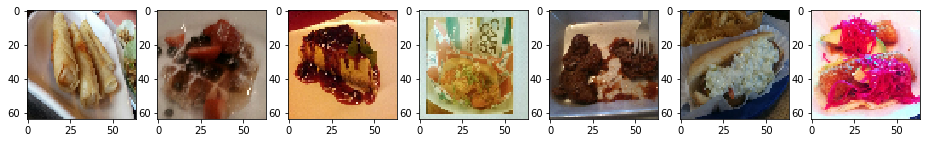

Data Augmentation Round 2


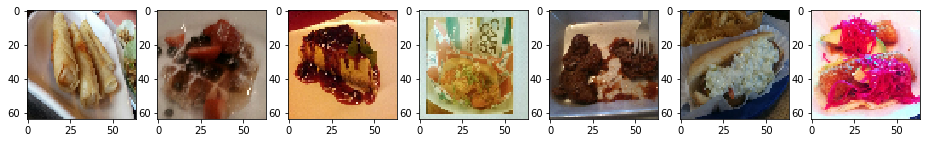

Data Augmentation Round 3


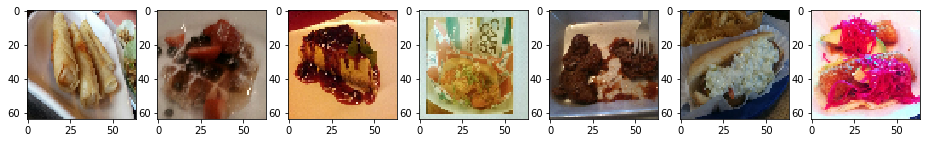

In [32]:
temp_ds = get_baseline_dataset(Train_Img_Filepaths, 
                               train_label_cat,
                               preproc_fn=valid_preprocessing_fn,
                               batch_size=7,
                               shuffle=False)
# Let's examine some of these augmented images
data_aug_iter = temp_ds.make_one_shot_iterator()
next_element = data_aug_iter.get_next()
for i in range(0,3):
    print('Data Augmentation Round '+str(i+1))
    with tf.Session() as sess: 
        batch_of_imgs, label = sess.run(next_element)
    
        # Running next element in our graph will produce a batch of images
        plt.figure(figsize=(16, 8))
        
        for a in range(0,7):
            img = batch_of_imgs[a]
            plt.subplot(1, 7, a+1)
            plt.imshow(img)
        
        plt.show()

In [33]:
model = ResNet50(include_top = False, weights=None, input_shape = img_shape, pooling = 'avg')

In [34]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [35]:

X = Dense(n_classes, activation='softmax', name='fc' + str(n_classes), kernel_initializer = glorot_uniform(seed=0))(model.output)

W0701 17:30:28.295094 4483450304 deprecation.py:506] From /Users/tombutterfield/.virtualenvs/food101env/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [36]:
model2 = Model(inputs=[model.input], outputs=[X])

In [37]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
______________________________________________________________________________________________

In [38]:
#opt = SGD(lr=.01, momentum=.9)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
cus = str(epochs)+'1noImgNetnoAug'
save_model_path = food101_dir+'tmp/weights'+cus+'.hdf5'
cp = tf.keras.callbacks.ModelCheckpoint(filepath=save_model_path, monitor='val_loss', save_best_only=True, verbose=1)

evaluation = model2.evaluate(test_ds, steps=int(np.ceil(num_test_examples / float(batch_size))))

In [40]:
history = model2.fit(train_ds, 
                   steps_per_epoch=int(np.ceil(num_train_examples / float(batch_size))),
                   epochs=epochs,
                   validation_data=valid_ds,
                   validation_steps=int(np.ceil(num_val_examples / float(batch_size))),
                   callbacks=[cp])

1893/1894 [============================>.] - ETA: 2s - loss: 4.6187 - acc: 0.0396
Epoch 00001: val_loss improved from inf to 4.36788, saving model to /Users/tombutterfield/Documents/GitHub/Food101-ML-Project/food-101/tmp/weights11noImgNetnoAug.hdf5
1894/1894 [==============================] - 4158s 2s/step - loss: 4.6184 - acc: 0.0396 - val_loss: 4.3679 - val_acc: 0.0489


evaluation = model2.evaluate(test_ds, steps=int(np.ceil(num_test_examples / float(batch_size))))